本文中，我们将使用*Python*模块[gensim](http://radimrehurek.com/gensim/models/word2vec.html#id6)对文本训练，生成词向量（即将每个词用向量表示）。使用的数据集为Mikolov所使用的[text8](http://mattmahoney.net/dc/text8.zip)，训练模型为*skip-gram*, *CBOW*。如果你对词向量的概念不甚熟悉，可以拜读下皮果提的[CSDN博客](http://blog.csdn.net/itplus/article/details/37969519)，他深入浅出的介绍了一些列的背景知识、相关概念以及理论推导。

In [1]:
from collections import Counter
from gensim.models import word2vec 
#from glove import Glove 
#from glove import Corpus 
import argparse
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


首先，我们读取本地的*text8*数据，关于*gensim*里面的词向量建模工具*word2vec*，可以参看官方文档。

In [36]:
sentences = word2vec.Text8Corpus('text8')

## CBOW模型

CBOW模型主要思想是给定中心词的上下文环境来推测该中心词，按照官方文档要求，如果我们将*word2vec*函数里面的*sg*参数设置为0，则模型就是*CBOW*（Continuous Bag-Of-Words Model)。这里，我们词向量的长度设置为80，窗户宽度为5，最小频数为3（低于此的词都会被过滤），采用的是*Negative Resampling*方法。

In [37]:
model = word2vec.Word2Vec(sentences, size=80, sg=0, window=5, min_count=3, workers=4)

我们可以查看下词向量，比如"computer"。

In [5]:
model['computer']

array([-2.76779509,  3.97483397,  3.92804289,  0.78569299,  0.28591177,
       -0.08572192, -2.15797257, -0.43208846,  0.79649729,  1.01759279,
        1.75512636,  0.47241279,  0.77679777, -1.47052217, -1.7883116 ,
       -0.17046975,  0.90310973, -3.50093055,  1.98023212, -0.33490324,
        0.88177401,  0.98761541,  0.85666955, -0.77827835,  0.17377822,
        0.75086874,  2.07845521, -0.55500573,  0.92443192,  1.25304365,
        2.79576254, -0.26070479, -1.27743053, -1.01700521, -1.73372245,
       -1.75398695,  1.72230399,  2.95474911, -0.80915427,  2.97554255,
        3.70463419, -1.21448994, -1.08330441, -1.34160042, -2.7457633 ,
        3.38733816, -2.11244941,  1.13222849, -1.34119558, -1.43689489,
       -0.34860915,  2.43077898, -2.10799098,  1.16207957,  0.65186501,
       -2.38459134, -1.70431709, -0.99706078, -0.39518705, -1.17896831,
        0.73737693,  1.40326822, -1.99371791, -2.19000363,  1.95494616,
       -2.11175299, -1.12509167,  0.89494759,  0.46368101, -1.95

我们可以对这些词向量进行可视化，利用PCA降维。为方便起见，我们取词频靠前的500个单词及其词向量，然后用散点图显示。

In [4]:
#统计词频
word_freq = Counter(model.vocab.keys())
stopwords = ['the', 'of', 'and', 'a', 'to', 's']

In [6]:
#选取词频靠前的500个单词，除去连接词
freq_words = word_freq.most_common(500)
freq_words = [k for k,v in freq_words if k not in stopwords]

In [7]:
#匹配词的向量
freq_words_vec = [model[word] for word in freq_words]

In [12]:
freq_words_vec = np.array(freq_words_vec)

In [13]:
#将词向量降维为2维向量
model_TSNE = TSNE(n_components=2, random_state=0)
freq_words_vec_2D = model_TSNE.fit_transform(freq_words_vec)

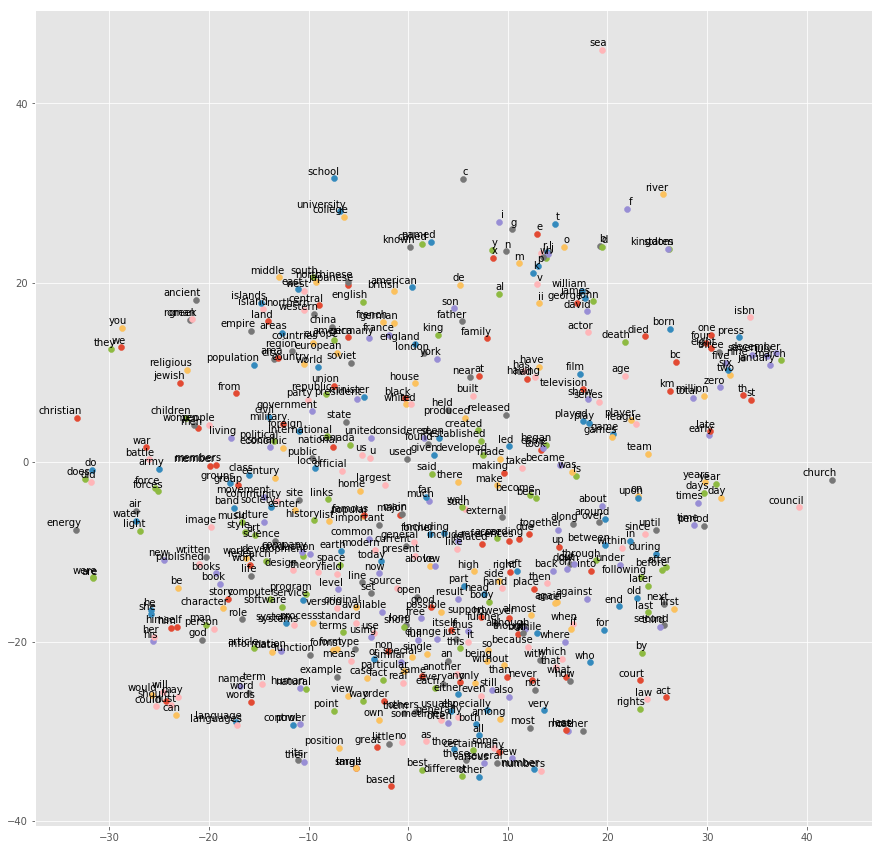

In [14]:
plt.style.use('ggplot')#设置ggplot风格的背景
def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    #显示散点图并进行标注
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
  plt.show()
plot(freq_words_vec_2D, freq_words)

从词向量散点图可以看出类似词语之间的聚类性，比如"school"、"university"、"college"三个单词距离很近。26个字母也分布在紧邻区域。

下面，我们可以利用*gensim*自带的函数之间查看下不同单词之间的相似度。

In [15]:
model.similarity('boy', 'girl')

0.76679602690668913

In [23]:
y1 = model.similarity("woman", "man")
print(u"woman和man的相似度为：", y1)
print("--------\n")

woman和man的相似度为： 0.764229181748
--------



In [19]:
# 计算某个词的相关词列表
y2 = model.most_similar("nice", topn=20)  # 20个最相关的
print(u"和nice最相关的词有：\n")
for item in y2:
    print(item[0], item[1])
print("--------\n")

和nice最相关的词有：

shit 0.6695374250411987
funny 0.6678035855293274
monica 0.6152181029319763
sorry 0.6037202477455139
veronica 0.5915796756744385
laugh 0.5824791789054871
heck 0.5802907347679138
fun 0.5785048604011536
lick 0.5751402378082275
waitress 0.5735601186752319
calixto 0.5713594555854797
everybody 0.5685411691665649
bitch 0.5671585202217102
lovely 0.5668800473213196
petomane 0.5631638765335083
chandler 0.561939537525177
belle 0.5616702437400818
hey 0.559166669845581
mama 0.5590835809707642
proudly 0.5585107803344727
--------



In [20]:
# 寻找对应关系
print(' "man" is to "father" as "woman" is to ...? \n')
y3 = model.most_similar(['woman', 'father'], ['man'], topn=3)
for item in y3:
    print(item[0], item[1])
print("--------\n")

 "man" is to "father" as "woman" is to ...? 

mother 0.8713424205780029
wife 0.8041367530822754
daughter 0.7783561944961548
--------



In [21]:
more_examples = ["he his she", "big bigger bad", "going went being"]
for example in more_examples:
    a, b, x = example.split()
    predicted = model.most_similar([x, b], [a])[0][0]
    print("'%s' is to '%s' as '%s' is to '%s'" % (a, b, x, predicted))
print("--------\n")

'he' is to 'his' as 'she' is to 'her'
'big' is to 'bigger' as 'bad' is to 'worse'
'going' is to 'went' as 'being' is to 'was'
--------



In [6]:
# 保存模型，以便重用
model.save("text8.model")
# 对应的加载方式
# model_2 = word2vec.Word2Vec.load("text8.model")

## Skip-gram模型

Skip-gram实际上与CBOW模型很类似，只不过这里是给定中心词来推断上下文环境。在*gensim*里面只需修改参数便可以实现训练过程的变换。

# Fetch 20Newsgroup Data

In [38]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', 
                                  shuffle=True,random_state=11)
newsgroups_test = fetch_20newsgroups(subset='test', 
                                  shuffle=True,random_state=11)

In [39]:
print("\n".join(newsgroups_train.data[0].split("\n")))

From: EEI.EEIIHY@memo.ericsson.SE (353-1-2800455)
Subject: help
Organization: The Internet
Lines: 5
NNTP-Posting-Host: enterpoop.mit.edu
To: XPERT@EXPO.LCS.MIT.EDU

--- Received from EEI.EEIIHY  353-1-2800455         93-04-26 12.28
  -> VAX.XPERT..EXPO.LCS.MIT.EDU..INET
  -: - - - - - - - - - - > MAIL USER IN VAX AND INTERNET
help




In [40]:
#数据预处理
import string
import re
def preProcessor(s):
    #s = s.encode('utf-8')
    s = re.sub('['+string.punctuation+']', '', s)
    s = re.sub('['+string.digits+']', '', s)
    s = s.lower()
    #s = s.translate(string.punctuation)
    return s

In [41]:
from sklearn.feature_extraction.text import  TfidfVectorizer
#Obtain tf-idf vector for each article
#remove stopwords in Enlgish
tfidfVectorizer = TfidfVectorizer(stop_words='english', min_df=3, preprocessor=preProcessor)
X_train_tfidf = tfidfVectorizer.fit_transform(newsgroups_train.data)
X_train_tfidf.shape

(11314, 34212)

In [42]:
X_test_tfidf = tfidfVectorizer.transform(newsgroups_test.data)

In [43]:
news_words = tfidfVectorizer.get_feature_names()
len(news_words)

34212

## TiIdf 模型分类

In [20]:
#利用朴素贝叶斯方法分类
import time
#Train the model
from sklearn.naive_bayes import MultinomialNB
start = time.time()
clf_nb = MultinomialNB().fit(X_train_tfidf,newsgroups_train.target)
#Test the model
predicted = clf_nb.predict(X_test_tfidf)
end = time.time()
print('Accuracy of Naive Bayes: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))
print("Training and testing time (secs): {:.3f}".format(end - start))

Accuracy of Naive Bayes: 0.827
Training and testing time (secs): 0.077


In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train_tfidf,newsgroups_train.target)
mlp.score(X_test_tfidf, newsgroups_test.target)

Iteration 1, loss = 0.78352961
Iteration 2, loss = 0.22983714
Iteration 3, loss = 0.21149219
Iteration 4, loss = 0.18035024
Iteration 5, loss = 0.14700262
Iteration 6, loss = 0.15946165
Iteration 7, loss = 0.21902805
Iteration 8, loss = 0.31095832
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.73818374933616571

## 词向量进行分类

In [44]:
#选择text8词库中的单词
news_words_selected = set(news_words).intersection(set(model.vocab.keys()))

In [45]:
len(news_words_selected)

23671

In [46]:
#抽取部分单词的tf-idf向量列
col_indice = [tfidfVectorizer.vocabulary_.get(w) for w in news_words_selected] 
X_train_tfidf_selected = X_train_tfidf[:, col_indice]
X_test_tfidf_selected = X_test_tfidf[:, col_indice]

In [47]:
#将每个文档所有单词词向量按照权重进行叠加
def buildDocVector(doc_tfidf, Word_model, size):
    vec = np.zeros((1, size))    
    count = 0
    for i, word in enumerate(list(news_words_selected)):
        try:
            if doc_tfidf[0, i] != 0:           
                vec += Word_model[word].reshape((1, size)) * doc_tfidf[0, i]
                count += 1
        except:
            print('Error', word, i)
            continue
    if count != 0:
        vec /= count
    return vec

In [48]:
#将每个文档转化成词向量模式，然后连接成特征矩阵
X_train_vec = np.concatenate([buildDocVector(doc_tfidf.toarray(), model, 80)
               for doc_tfidf in X_train_tfidf_selected])

In [49]:
X_train_vec.shape

(11314, 80)

In [50]:
X_test_vec = np.concatenate([buildDocVector(doc_tfidf.toarray(), model, 80)
               for doc_tfidf in X_test_tfidf_selected])

In [51]:
#from sklearn.preprocessing import scale
#X_train_vec = scale(X_train_vec)
#X_test_vec = scale(X_test_vec)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train_vec, newsgroups_train.target)
predicted = rf_model.predict(X_test_vec)
print('Accuracy of Random Forest: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Random Forest: 0.400


In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-7, random_state=1,
                    learning_rate_init=.02)

mlp.fit(X_train_vec,newsgroups_train.target)
mlp.score(X_test_vec, newsgroups_test.target)

Iteration 1, loss = 2.15163911
Iteration 2, loss = 1.62246972
Iteration 3, loss = 1.46782261
Iteration 4, loss = 1.39647509
Iteration 5, loss = 1.32823744
Iteration 6, loss = 1.27472237
Iteration 7, loss = 1.24640986
Iteration 8, loss = 1.19211433
Iteration 9, loss = 1.18587021
Iteration 10, loss = 1.13480296
Iteration 11, loss = 1.11570530
Iteration 12, loss = 1.08457257
Iteration 13, loss = 1.07370143
Iteration 14, loss = 1.03097487
Iteration 15, loss = 0.99755177
Iteration 16, loss = 0.98023402
Iteration 17, loss = 0.96836518
Iteration 18, loss = 0.96253254
Iteration 19, loss = 0.93723953
Iteration 20, loss = 0.91123293
Iteration 21, loss = 0.88905130
Iteration 22, loss = 0.88988572
Iteration 23, loss = 0.86922579
Iteration 24, loss = 0.83770233
Iteration 25, loss = 0.84001387
Iteration 26, loss = 0.83466469
Iteration 27, loss = 0.78164227
Iteration 28, loss = 0.79799583
Iteration 29, loss = 0.79285351
Iteration 30, loss = 0.76839337
Iteration 31, loss = 0.77120023
Iteration 32, los

0.53584705257567711

## 利用本地20新闻数据训练词向量

In [26]:
def cleanText(corpus):
    corpus = [preProcessor(z) for z in corpus]
    corpus = [z.lower().replace('\n','').split() for z in corpus]    
    return corpus
train_corpus = cleanText(newsgroups_train.data)   
test_corpus = cleanText(newsgroups_test.data)   

In [27]:
news_w2v = word2vec.Word2Vec(size=80, sg=0, window=5, min_count=3, workers=4)
news_w2v.build_vocab(train_corpus)
news_w2v.train(train_corpus)

10373675

In [15]:
#将每个文档所有单词词向量按照权重进行叠加
def buildDocVector(news_w2v, text, size):
    vec = np.zeros((1, size))    
    count = 0
    for word in text:
        try:
            vec += news_w2v[word].reshape((1, size))
            count += 1
        except:
            #print('Error', word)
            continue
    if count != 0:
        vec /= count
    return vec

In [16]:
z = train_corpus[0]
buildDocVector(news_w2v, z, 80)

array([[ -3.75757641e-01,   1.31421631e-01,   6.86432138e-01,
          3.11641204e-01,  -2.23684405e-01,  -4.53018805e-01,
         -5.05873735e-01,  -2.65927970e-01,  -1.07871573e-01,
          9.35439062e-01,   4.62201775e-01,   4.63752413e-02,
          3.23465649e-01,   1.90796381e-01,  -2.01126952e-01,
          1.71010921e-01,  -2.12948160e-01,  -6.84871729e-01,
         -3.17372248e-01,  -7.64212786e-01,  -4.52056909e-01,
          1.37963940e-01,  -1.41726278e-01,   9.93215583e-01,
         -5.66661894e-01,  -5.75020586e-01,  -8.75857174e-03,
         -6.56936146e-01,   1.32650930e-01,  -2.83098011e-01,
          2.37439054e-01,  -8.46229414e-02,  -5.91790326e-01,
          2.78363721e-01,   5.03412005e-01,  -1.13391559e+00,
         -8.38308734e-01,  -2.19855747e-01,   2.68048861e-01,
         -4.47657188e-01,   4.66707750e-01,  -3.07157631e-01,
          2.82448690e-01,   1.26590508e-01,   3.81026012e-01,
          1.01682003e-01,   3.83659612e-01,  -4.18803351e-01,
        

In [17]:
#将每个文档转化成词向量模式，然后连接成特征矩阵
X_train_vec = np.concatenate([buildDocVector(news_w2v, z, 80)
               for z in train_corpus])

In [18]:
X_test_vec = np.concatenate([buildDocVector(news_w2v, z, 80)
               for z in test_corpus])

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train_vec, newsgroups_train.target)
predicted = rf_model.predict(X_test_vec)
print('Accuracy of Random Forest: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Random Forest: 0.302


## Doc2Vec模型

In [29]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
#清除数字和换行符，将标点符号当作词
def cleanText(corpus):
    for c in string.punctuation:  
        corpus = [z.lower().replace(c,' %s '%c ) for z in corpus]
    #corpus = [re.sub('['+string.punctuation+']', '', s) for s in corpus]
    corpus = [re.sub('['+string.digits+']', '', z) for z in corpus]
    corpus = [z.lower().replace('\n','').split() for z in corpus]    
    return corpus
train_corpus = cleanText(newsgroups_train.data)   
test_corpus = cleanText(newsgroups_test.data)   

In [6]:
from gensim.models import doc2vec
labeledSentence = doc2vec.LabeledSentence
#给每篇新闻加上标签
def labelizeNews(news, label_type):
    labelized = []
    for i, v in enumerate(news):
        label = '%s_%s'%(label_type, i)
        labelized.append(labeledSentence(v, [label]))
    return labelized
all_corpus_tagged = np.concatenate((train_corpus, test_corpus))
all_corpus_tagged = labelizeNews(all_corpus_tagged, 'document')
train_corpus_tagged = all_corpus_tagged[:len(train_corpus)]
test_corpus_tagged = all_corpus_tagged[len(train_corpus):]

In [30]:
size = 200
#文档向量训练
news_d2v_dm = doc2vec.Doc2Vec(all_corpus_tagged, min_count=1, window=5, size=size, 
                              dm=1, sample=1e-3, negative=5, workers=3, alpha=0.01, min_alpha=0.01)

In [31]:
import random
for _ in range(50):
    news_d2v_dm.train(all_corpus_tagged)
    #news_d2v_dm.alpha -= 0.002
    #news_d2v_dm.min_alpha = news_d2v_dm.alpha

#for _ in range(10):
    #news_d2v_dm.train(test_corpus_tagged)
    #news_d2v_dm.alpha == 0.002
    #news_d2v_dm.min_alpha = news_d2v_dm.alpha

In [32]:
#第一篇新闻的向量
len(news_d2v_dm.docvecs)

18846

In [33]:
def getVecs(model, tagged_corpus, size):
    vecs = [model.docvecs[z.tags[0]].reshape((1, size)) for z in tagged_corpus]
    return np.concatenate(vecs)

In [34]:
#获取每篇新闻的向量
doc_vecs = np.concatenate([vec.reshape(1, size) for vec in news_d2v_dm.docvecs])
train_doc_vecs = getVecs(news_d2v_dm, train_corpus_tagged, size)
test_doc_vecs = getVecs(news_d2v_dm, test_corpus_tagged, size)
train_doc_vecs.shape

(11314, 200)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(train_doc_vecs, newsgroups_train.target)
predicted = rf_model.predict(test_doc_vecs)
print('Accuracy of Random Forest: {:.3f}'.format(np.mean(predicted == newsgroups_test.target)))

Accuracy of Random Forest: 0.235


## NLTK Test

In [52]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]

In [55]:
movie_reviews.categories()

['neg', 'pos']

In [53]:
len(movie_reviews.fileids())

2000

In [56]:
len(documents)

2000

In [29]:
import nltk
np.random.shuffle(documents)
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = all_words.keys()
word_features = list(word_features)[:2000]

In [30]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [31]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [32]:
print(nltk.classify.accuracy(classifier, test_set))

0.67


In [38]:
from nltk.corpus import brown

In [44]:
b = word2vec.Word2Vec(brown.sents())

In [45]:
b.most_similar('money', topn=4)

[('job', 0.920224130153656),
 ('chance', 0.9074326753616333),
 ('care', 0.8910205364227295),
 ('trouble', 0.8722820281982422)]